## 決定木回帰

・ (MedInc)median income in block-収入の中央値  
・(HouseAge)median house age in block-ブロック内の家の中央年齢  
・(AveRooms)average number of rooms-平均部屋数  
・(AveBedrms)average number of bedrooms-ベッドルームの平均数  
・(Population)block population-ブロック人口  
・(AveOccup)average house occupancy-平均住宅占有率  
・(Latitude)house block latitude-ハウスブロックの緯度  
・(Longitude)house block longitude-ハウスブロックの経度  
・MedHouseVal（median house value）：「住宅価格」（100,000ドル＝10万ドル単位）の中央値。通常はこの数値が目的変数として使われる

In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
data=sklearn.datasets.fetch_california_housing()
feature=data.data
target=data.target

In [3]:
df=pd.DataFrame(feature, columns=data.feature_names)
df['target']=target
df=df.sample(frac=1, random_state=1).reset_index().drop('index', axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36,3.55000
1,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78,0.70700
2,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42,2.29400
3,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28,1.12500
4,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13,2.25400
...,...,...,...,...,...,...,...,...,...
20635,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88,2.05300
20636,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63,5.00001
20637,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26,1.04800
20638,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16,1.40700


In [4]:
dtr=DecisionTreeRegressor()
dtr.fit(df.loc[:,'MedInc':'Longitude'], df['target'])
train_pred=dtr.predict(df.loc[:,'MedInc':'Longitude'])

In [5]:
mean_squared_error(df['target'], train_pred, squared=False)

3.223072662167874e-16

In [6]:
dtr.feature_importances_

array([0.52497146, 0.05005491, 0.05314145, 0.02771405, 0.03246372,
       0.13173282, 0.09384823, 0.08607335])

10分割交差検証にてRMSEを算出  
今回のデータは20640件で学習

In [7]:
scores=cross_val_score(dtr, df.loc[:,'MedInc':'Longitude'] ,df['target'] , scoring='neg_mean_squared_error', cv=10)
scores

array([-0.51762764, -0.49942021, -0.53935571, -0.52519742, -0.48637843,
       -0.56241855, -0.52326932, -0.49538599, -0.59171303, -0.50232805])

In [8]:
#RMSEをそれぞれ算出
np.sqrt(-scores)

array([0.71946344, 0.70669669, 0.73440841, 0.72470506, 0.69740837,
       0.7499457 , 0.72337357, 0.70383662, 0.76922885, 0.70875105])

In [9]:
#平均して交差検証による正式なRMSEを出す
print('RMSE',np.mean(np.sqrt(-scores)))

RMSE 0.7237817763487977


In [10]:
#plot_tree(dtr, filled=True)は長いからやらないほうがよい

ホールドアウト法（7：3に分割）

In [11]:
df_train=df.loc[:14446,:]
df_test=df.loc[14447:,:]
df_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
14447,5.0462,34.0,6.370492,1.049180,895.0,2.934426,34.21,-118.59,2.27700
14448,4.2902,39.0,5.673040,0.956023,1243.0,2.376673,38.12,-122.24,1.52400
14449,2.1771,18.0,5.127273,1.077273,772.0,3.509091,36.44,-119.97,0.39200
14450,4.4615,20.0,4.357006,0.955854,1070.0,2.053743,33.83,-118.38,3.84800
14451,3.7500,19.0,4.473146,1.038363,969.0,2.478261,33.84,-117.95,1.73400
...,...,...,...,...,...,...,...,...,...
20635,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88,2.05300
20636,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63,5.00001
20637,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26,1.04800
20638,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16,1.40700


In [12]:
x_train=df_train.loc[:,'MedInc':'Longitude']
y_train=df_train['target']
x_test=df_test.loc[:,'MedInc':'Longitude']
y_test=df_test['target']

trainデータを決定木回帰で学習

In [13]:
dtr_2=DecisionTreeRegressor()
dtr_2.fit(x_train, y_train)

DecisionTreeRegressor()

In [14]:
#testデータに対して予測
test_pred=dtr_2.predict(x_test)

In [15]:
print('RMSE_Test_notpare', mean_squared_error(y_test, test_pred, squared=False))

RMSE_Test_notpare 0.7344106210608491


### グリッドサーチによるハイパーパラメータ探索  
決定木のハイパーパラメータ：'max_depth'、'min_samples_leaf'、'min_samples_split'

In [28]:
param = {'max_depth':[13],
         'min_samples_leaf':[10],
         'min_samples_split':[3, 4, 5, 6, 7, 8, 9, 10]}
grid_seach = GridSearchCV(DecisionTreeRegressor(), param_grid=param, cv=10)
grid_seach.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [13], 'min_samples_leaf': [10],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]})

In [29]:
#グリッドサーチのベストスコア
grid_seach.best_params_

{'max_depth': 13, 'min_samples_leaf': 10, 'min_samples_split': 4}

In [30]:
#上記学習済みモデルを使ってx_testでy_testを予測
test_pred_grid=grid_seach.predict(x_test)
print('RMSE_Test_para', mean_squared_error(y_test, test_pred_grid, squared=False))

RMSE_Test_para 0.638412480001396


### 結果（決定木回帰）
y_testを予測  
ハイパラ探索前：RMSE_Test_notpare 0.7357381359778418  
ハイパラ探索後：RMSE_Test_para 0.6384285481252693  
注意：min_samples_splitはグリッドサーチによって値が変わってくる

In [31]:
#念のためmax_depthだけもう一度ハイパラ探索⇒RMSE算出
param2={'max_depth':[10,11,12,13,14]}
grid_search=GridSearchCV(DecisionTreeRegressor(), param_grid=param2, cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15]})

In [33]:
grid_search.best_params_

{'max_depth': 10}

In [34]:
print('RMSE_Test_1para',mean_squared_error(y_test, grid_search.predict(x_test), squared=False))

RMSE_Test_1para 0.6580971351953847


グリッドサーチ済みのモデルで特徴量重要度を算出

In [35]:
#グリッドサーチにて算出したハイパーパラメータを入れて決定木のインスタンスを作成＆予測＆RMSE算出
dtr_3=DecisionTreeRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=4).fit(x_train, y_train)
test_pred_grid_2 = dtr_3.predict(x_test)
print(mean_squared_error(y_test, test_pred_grid_2, squared=False))

0.6384254174952494


In [36]:
#特徴量重要度算出
dtr_3.feature_importances_

array([0.59390673, 0.05101942, 0.03922907, 0.01181933, 0.01226927,
       0.13788303, 0.07591784, 0.0779553 ])

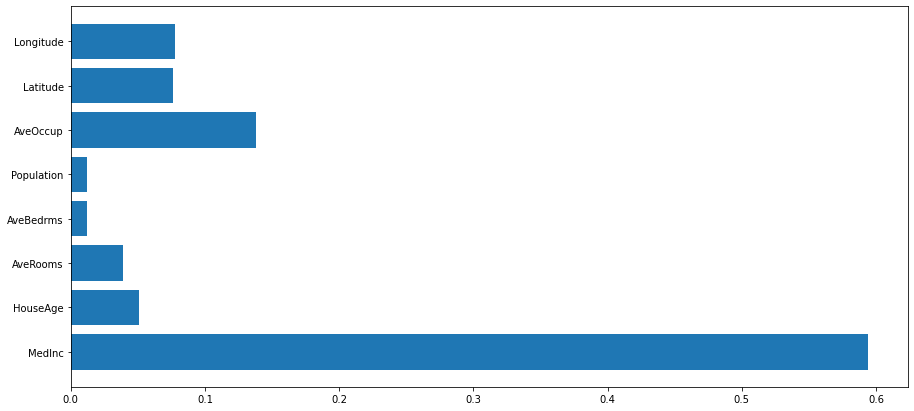

In [39]:
plt.figure(figsize=(15,7))
plt.barh(range(8), dtr_3.feature_importances_, tick_label=x_train.columns)
plt.show()

あまりハイパラ探索する前と変わらない